# Import e gestione dataset

In [39]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor,ExtraTreesClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
import time

In [3]:
# Carica il dataset
boston = pd.read_csv("Dataset/BostonHousing.csv")

boston.head()


,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [4]:
print(boston['crim'].isnull().values.any())
print(boston['zn'].isnull().values.any())
print(boston['indus'].isnull().values.any())
print(boston['chas'].isnull().values.any())
print(boston['nox'].isnull().values.any())
print(boston['rm'].isnull().values.any())
print(boston['age'].isnull().values.any())
print(boston['dis'].isnull().values.any())
print(boston['rad'].isnull().values.any())
print(boston['tax'].isnull().values.any())
print(boston['ptratio'].isnull().values.any())
print(boston['b'].isnull().values.any())
print(boston['lstat'].isnull().values.any())
print(boston['medv'].isnull().values.any())


False
False
False
False
False
True
False
False
False
False
False
False
False
False


In [5]:
means = boston['rm'].mean()
print(means)

tre = boston['rm'].fillna(means)
boston['rm'] = tre

print(tre.isnull().values.any())


6.28434131736527
False


In [6]:
target_column = 'medv'

data = boston.drop(target_column, axis=1)  # features: tutte le colonne tranne 'MEDV'
target = boston[target_column] 

# Suddividi i dati in sottoinsiemi di addestramento e test
X_train, X_test, y_train, y_test = train_test_split(
    data,
    target,
    test_size=0.4,
    random_state=42, # 
)

# Supervised learning

### SVR

In [37]:
model = SVR()

# Definizione griglia parametri
param_grid = {
    'kernel': ['linear', 'poly', 'rbf'],
    'C': [0.1, 1, 10, 100]
}

# Creazione dell'oggetto GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5)

# Esecuzione della ricerca dei parametri attraverso cross-validation
grid_search.fit(X_train, y_train)

# Parametri migliori trovati
print("Migliori parametri:", grid_search.best_params_)

# Valutazione del modello migliore sul test set
best_model = grid_search.best_estimator_
print(f"Best score: {grid_search.best_score_}")

# --------- SCORING ---------
y_pred = best_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print(f"MSE sul test set: {mse}")

Migliori parametri: {'C': 1, 'kernel': 'linear'}
Best score: 0.6752332512608853
MSE sul test set: 25.21032449811733


In [36]:
svr_rbf = SVR(kernel='linear', C=10, gamma='scale')
svr_rbf.fit(X_train, y_train)
y_pred_scaled = svr_rbf.predict(X_test)

mse_svr = mean_squared_error(y_test, y_pred_scaled)
print(f'Mean Squared Error (MSE): {mse_svr:.2f}')

Mean Squared Error (MSE): 23.69


In [ ]:
value = [24.14, 25.21, 23.69, 54.61]
value = [61.96, 58.60, 49.32, 36.49]
value = [66.62, 57.71, 52.02, 38.99]

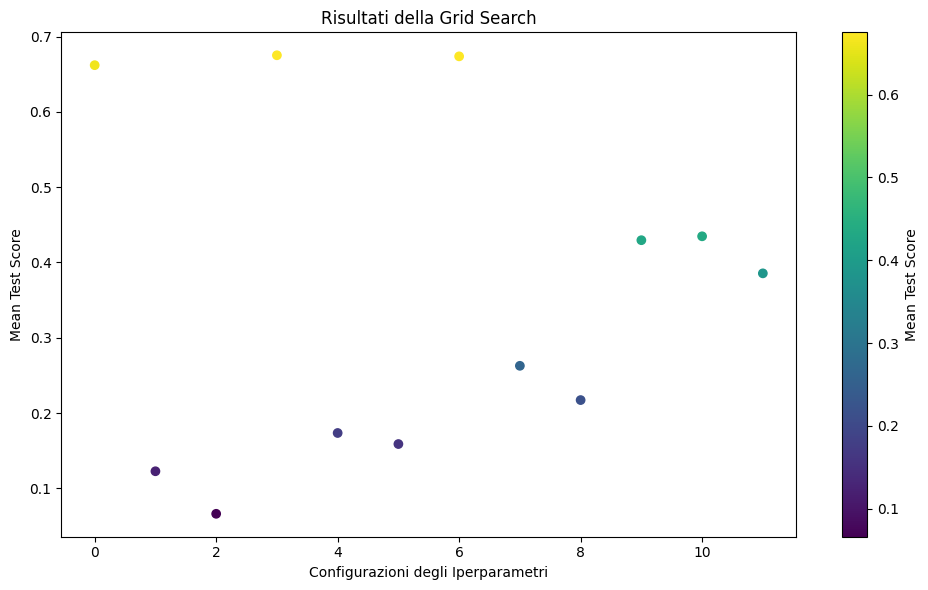

In [8]:
# Estrazione dei risultati
results = grid_search.cv_results_
params = results['params']
mean_test_score = results['mean_test_score']

# Plot dei risultati
plt.figure(figsize=(10, 6))
plt.scatter(range(len(params)), mean_test_score, c=mean_test_score, cmap='viridis', marker='o')
plt.colorbar(label='Mean Test Score')
plt.title('Risultati della Grid Search')
plt.xlabel('Configurazioni degli Iperparametri')
plt.ylabel('Mean Test Score')
plt.tight_layout()
plt.show()

In [40]:
start_time = time.time()

svr_rbf = SVR(kernel='linear', C=10, gamma='scale')

svr_rbf.fit(X_train, y_train)

y_pred_scaled = svr_rbf.predict(X_test)

mse_svr = mean_squared_error(y_test, y_pred_scaled)
mae_svr = mean_absolute_error(y_test, y_pred_scaled)
r2_svr = r2_score(y_test, y_pred_scaled)

print(f'Mean Squared Error (MSE): {mse_svr:.2f}')
print(f'Mean Absolute Error (MAE): {mae_svr:.2f}')
print(f'R-squared (R²): {r2_svr:.2f}')

end_time = time.time()

# Calcolo tempo
execution_time = end_time - start_time
print(f"Tempo di esecuzione: {execution_time} secondi")

'''
# Plotting the results
plt.scatter(X_test, y_test, color='darkorange', label='True values')
plt.plot(X_test, y_pred, color='navy', lw=2, label='SVR predictions')
plt.xlabel('Data')
plt.ylabel('Target')
plt.title('Support Vector Regression')
plt.legend()
plt.show()
'''

Mean Squared Error (MSE): 23.69
Mean Absolute Error (MAE): 3.16
R-squared (R²): 0.69
Tempo di esecuzione: 6.171922922134399 secondi


"\n# Plotting the results\nplt.scatter(X_test, y_test, color='darkorange', label='True values')\nplt.plot(X_test, y_pred, color='navy', lw=2, label='SVR predictions')\nplt.xlabel('Data')\nplt.ylabel('Target')\nplt.title('Support Vector Regression')\nplt.legend()\nplt.show()\n"

### Linear regression

In [42]:
start_time = time.time()

lin_reg = LinearRegression()

lin_reg.fit(X_train, y_train)

y_pred_scaled = lin_reg.predict(X_test)

mse_lr = mean_squared_error(y_test, y_pred_scaled)
mae_lr = mean_absolute_error(y_test, y_pred_scaled)
r2_lr = r2_score(y_test, y_pred_scaled)

print(f'Mean Squared Error (MSE): {mse_lr:.2f}')
print(f'Mean Absolute Error (MAE): {mae_lr:.2f}')
print(f'R-squared (R²): {r2_lr:.2f}')

end_time = time.time()

# Calcolo tempo
execution_time = end_time - start_time
print(f"Tempo di esecuzione: {execution_time} secondi")

'''
# Plotting the results
plt.scatter(X_test, y_test, color='darkorange', label='True values')
plt.plot(X_test, y_pred, color='navy', lw=2, label='SVR predictions')
plt.xlabel('Data')
plt.ylabel('Target')
plt.title('Support Vector Regression')
plt.legend()
plt.show()
'''

Mean Squared Error (MSE): 21.89
Mean Absolute Error (MAE): 3.31
R-squared (R²): 0.71
Tempo di esecuzione: 0.0057370662689208984 secondi


"\n# Plotting the results\nplt.scatter(X_test, y_test, color='darkorange', label='True values')\nplt.plot(X_test, y_pred, color='navy', lw=2, label='SVR predictions')\nplt.xlabel('Data')\nplt.ylabel('Target')\nplt.title('Support Vector Regression')\nplt.legend()\nplt.show()\n"

### Random Forest

In [11]:
# Definizione del modello SVR
model = RandomForestRegressor()

# Definizione della griglia dei parametri da testare
param_grid = {
    'n_estimators': [100,200,300,400],      # Number of trees in the forest, miglior performance ma peggiore costo computazionale
    'max_depth': [None, 10, 20, 30],     # Maximum depth of the trees, riduce overfitting
}

'''
'max_features': ['auto', 'sqrt'],    # Number of features to consider at every split
'max_depth': [None, 10, 20, 30],
'''

# Creazione dell'oggetto GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5)

# Esecuzione della ricerca dei parametri attraverso cross-validation
grid_search.fit(X_train, y_train)

# Parametri migliori trovati
print("Migliori parametri:", grid_search.best_params_)

# Valutazione del modello migliore sul test set
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"MSE sul test set: {mse}")

Migliori parametri: {'max_depth': None, 'n_estimators': 100}
MSE sul test set: 10.76998260591133


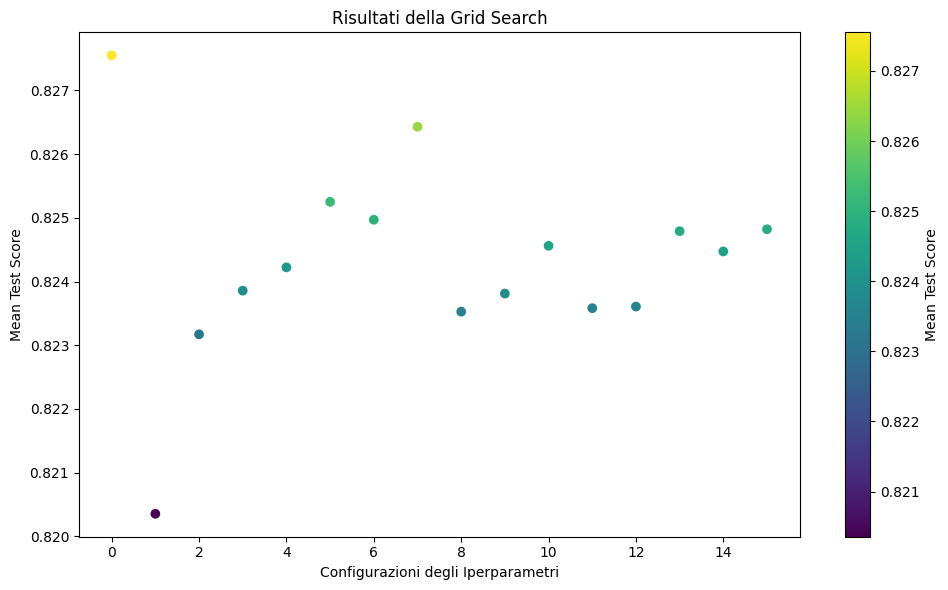

In [12]:
# Estrazione dei risultati
results = grid_search.cv_results_
params = results['params']
mean_test_score = results['mean_test_score']

# Plot dei risultati
plt.figure(figsize=(10, 6))
plt.scatter(range(len(params)), mean_test_score, c=mean_test_score, cmap='viridis', marker='o')
plt.colorbar(label='Mean Test Score')
plt.title('Risultati della Grid Search')
plt.xlabel('Configurazioni degli Iperparametri')
plt.ylabel('Mean Test Score')
plt.tight_layout()
plt.show()

In [70]:

start_time = time.time()
lin_reg = RandomForestRegressor(n_estimators=200, max_depth = 10)

lin_reg.fit(X_train, y_train)

y_pred_scaled = lin_reg.predict(X_test)

mse_rf = mean_squared_error(y_test, y_pred_scaled)
mae_rf = mean_absolute_error(y_test, y_pred_scaled)
r2_rf = r2_score(y_test, y_pred_scaled)

print(f'Mean Squared Error (MSE): {mse_rf:.2f}')
print(f'Mean Absolute Error (MAE): {mae_rf:.2f}')
print(f'R-squared (R²): {r2_rf:.2f}')

end_time = time.time()

# Calcolo tempo
execution_time = end_time - start_time
print(f"Tempo di esecuzione: {execution_time} secondi")
'''
# Plotting the results
plt.scatter(X_test, y_test, color='darkorange', label='True values')
plt.plot(X_test, y_pred, color='navy', lw=2, label='SVR predictions')
plt.xlabel('Data')
plt.ylabel('Target')
plt.title('Support Vector Regression')
plt.legend()
plt.show()
'''

Mean Squared Error (MSE): 10.85
Mean Absolute Error (MAE): 2.24
R-squared (R²): 0.86
Tempo di esecuzione: 0.2756049633026123 secondi


"\n# Plotting the results\nplt.scatter(X_test, y_test, color='darkorange', label='True values')\nplt.plot(X_test, y_pred, color='navy', lw=2, label='SVR predictions')\nplt.xlabel('Data')\nplt.ylabel('Target')\nplt.title('Support Vector Regression')\nplt.legend()\nplt.show()\n"

### GBR

In [14]:
# Definizione del modello SVR
model = GradientBoostingRegressor()

# Definizione della griglia dei parametri da testare
param_grid = {
    'n_estimators': [100,200,300,400],      # Number of trees in the forest
    'max_depth': [None, 10, 20, 30],     # Maximum depth of the trees
}

'''
'max_features': ['auto', 'sqrt'],    # Number of features to consider at every split
'max_depth': [None, 10, 20, 30],
'''

# Creazione dell'oggetto GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5)

# Esecuzione della ricerca dei parametri attraverso cross-validation
grid_search.fit(X_train, y_train)

# Parametri migliori trovati
print("Migliori parametri:", grid_search.best_params_)

# Valutazione del modello migliore sul test set
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"MSE sul test set: {mse}")

Migliori parametri: {'max_depth': 10, 'n_estimators': 400}
MSE sul test set: 19.28472457277452


In [89]:
start_time = time.time()
lin_reg = GradientBoostingRegressor(n_estimators = 300 ,max_depth = 10)

lin_reg.fit(X_train, y_train)

y_pred_scaled = lin_reg.predict(X_test)

mse_gbr = mean_squared_error(y_test, y_pred_scaled)
mae_gbr = mean_absolute_error(y_test, y_pred_scaled)
r2_gbr = r2_score(y_test, y_pred_scaled)

print(f'Mean Squared Error (MSE): {mse_gbr:.2f}')
print(f'Mean Absolute Error (MAE): {mae_gbr:.2f}')
print(f'R-squared (R²): {r2_gbr:.2f}')

end_time = time.time()

# Calcolo tempo
execution_time = end_time - start_time
print(f"Tempo di esecuzione: {execution_time} secondi")

'''
# Plotting the results
plt.scatter(X_test, y_test, color='darkorange', label='True values')
plt.plot(X_test, y_pred, color='navy', lw=2, label='SVR predictions')
plt.xlabel('Data')
plt.ylabel('Target')
plt.title('Support Vector Regression')
plt.legend()
plt.show()
'''

Mean Squared Error (MSE): 19.11
Mean Absolute Error (MAE): 2.79
R-squared (R²): 0.75
Tempo di esecuzione: 0.49560999870300293 secondi


"\n# Plotting the results\nplt.scatter(X_test, y_test, color='darkorange', label='True values')\nplt.plot(X_test, y_pred, color='navy', lw=2, label='SVR predictions')\nplt.xlabel('Data')\nplt.ylabel('Target')\nplt.title('Support Vector Regression')\nplt.legend()\nplt.show()\n"

In [ ]:
value = [20.25,  19.52, 19.67, 19.59] 100
value = [20.33, , 20.13, 19.89] 200
value = [20.16, , 20.34, 19.96] 300
value = [20.00, 19.52, 19.66, 20.00] 400

### Saga

# Confronto metodi

In [16]:
print("------ SVR ------")
print(mse_svr)
print(mae_svr)
print(r2_svr)

print("------ LR ------")
print(mse_lr)
print(mae_lr)
print(r2_lr)

print("------ RF ------")
print(mse_rf)
print(mae_rf)
print(r2_rf)

print("------ GBR ------")
print(mse_gbr)
print(mae_gbr)
print(r2_gbr)

------ SVR ------
25.21032449811733
3.171654675786188
0.6680387825350643
------ LR ------
21.8892567186541
3.305263065554219
0.7117695049792168
------ RF ------
10.398611043103449
2.195051724137928
0.8630745279748092
------ GBR ------
19.67682305047363
2.827120475821398
0.7409021000041023


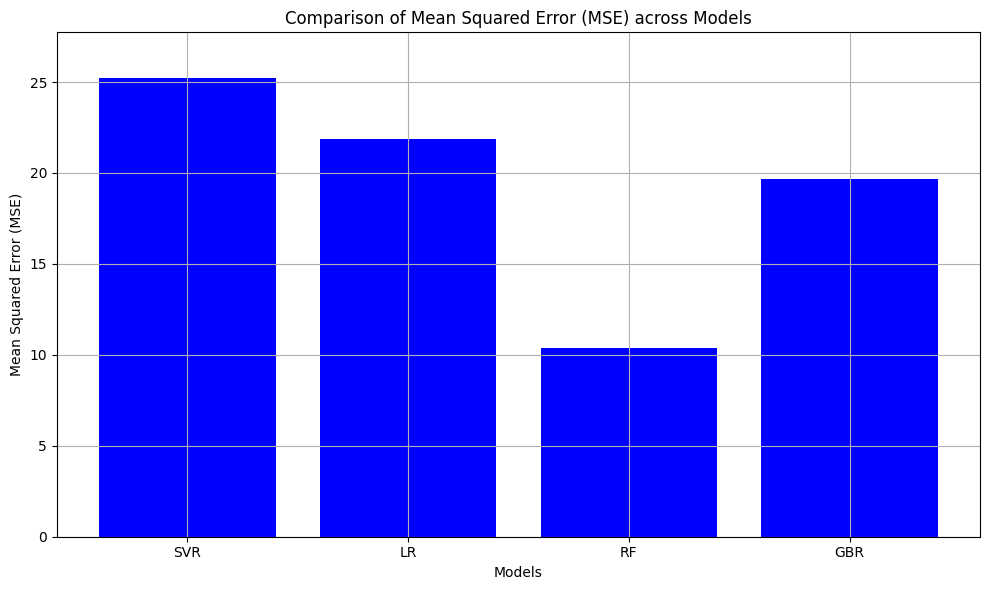

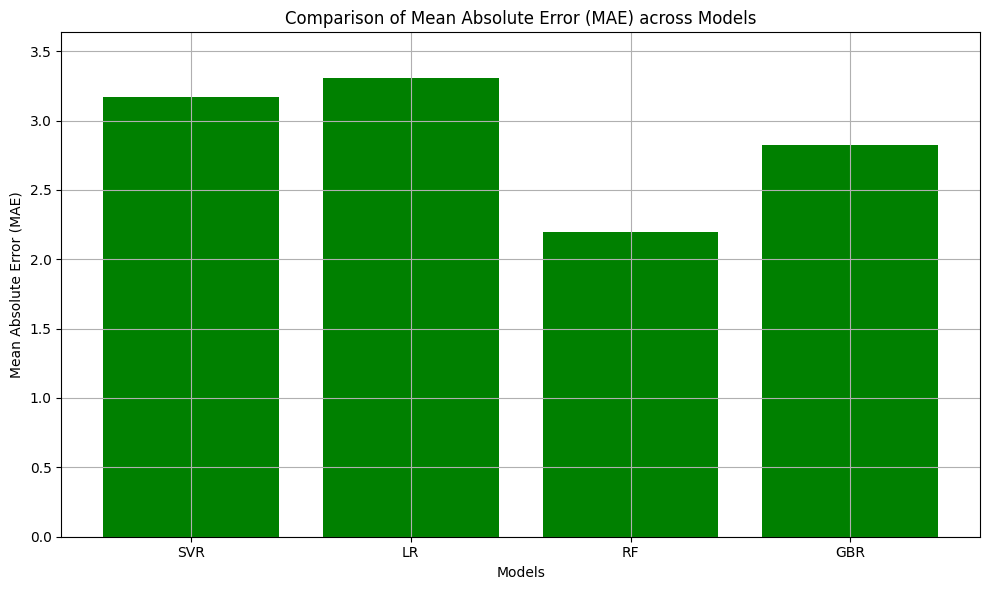

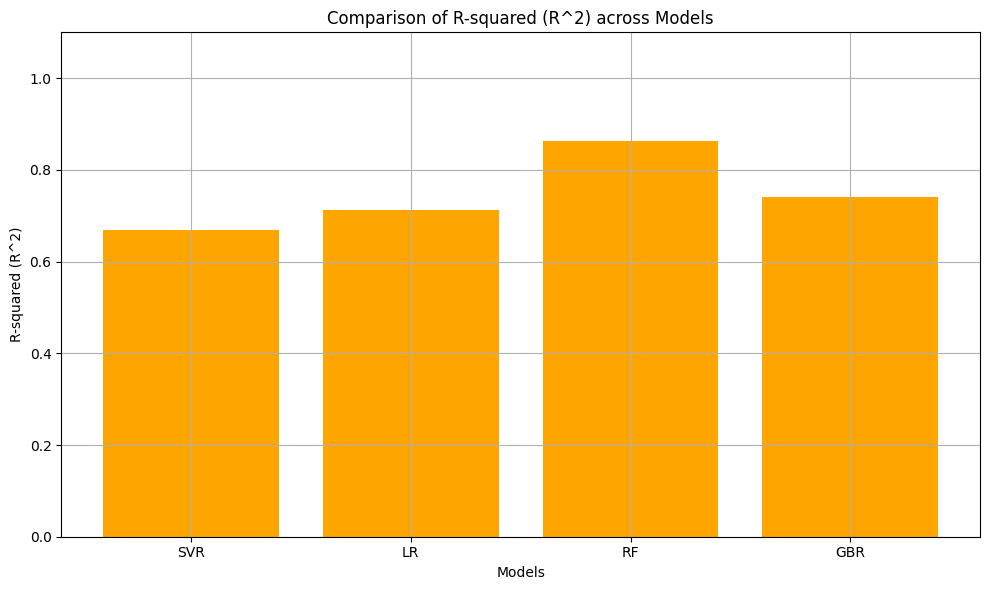

In [17]:
import matplotlib.pyplot as plt

# Define model names and corresponding metrics
models = ['SVR', 'LR', 'RF', 'GBR']
mse_scores = [mse_svr, mse_lr, mse_rf, mse_gbr]
mae_scores = [mae_svr, mae_lr, mae_rf, mae_gbr]
r2_scores = [r2_svr, r2_lr, r2_rf, r2_gbr]

# Plot Mean Squared Error (MSE)
plt.figure(figsize=(10, 6))
plt.bar(models, mse_scores, color='blue')
plt.xlabel('Models')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('Comparison of Mean Squared Error (MSE) across Models')
plt.ylim([0, max(mse_scores) * 1.1])  # Set ylim to 10% more than the maximum value for better visualization
plt.grid(True)
plt.tight_layout()
plt.show()

# Plot Mean Absolute Error (MAE)
plt.figure(figsize=(10, 6))
plt.bar(models, mae_scores, color='green')
plt.xlabel('Models')
plt.ylabel('Mean Absolute Error (MAE)')
plt.title('Comparison of Mean Absolute Error (MAE) across Models')
plt.ylim([0, max(mae_scores) * 1.1])  # Set ylim to 10% more than the maximum value for better visualization
plt.grid(True)
plt.tight_layout()
plt.show()

# Plot R-squared (R2)
plt.figure(figsize=(10, 6))
plt.bar(models, r2_scores, color='orange')
plt.xlabel('Models')
plt.ylabel('R-squared (R^2)')
plt.title('Comparison of R-squared (R^2) across Models')
plt.ylim([0, 1.1])  # R-squared ranges from 0 to 1
plt.grid(True)
plt.tight_layout()
plt.show()

# Unsupervised learning

/var/folders/jp/1q3hx_0x2rld5qy0bmr4r4xm0000gn/T/ipykernel_1393/811199951.py:23: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X_pca[:, 0], X_pca[:, 1],c='red', cmap='viridis', edgecolor='k', s=50)


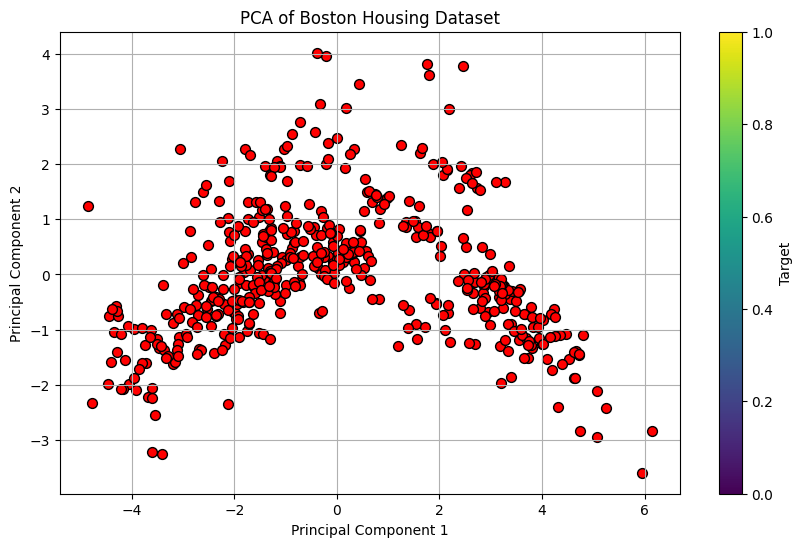

In [18]:
target_column = 'medv'

data = boston.drop(target_column, axis=1)  # features: tutte le colonne tranne 'MEDV'
target = boston[target_column] 

# Suddividi i dati in sottoinsiemi di addestramento e test
X_train, X_test = train_test_split(
    data,
    test_size=0.4,
    random_state=42, # 
)

# Normalizzazione dei dati
scaler = StandardScaler()
X_scaled = scaler.fit_transform(data)

# Applicazione PCA per riduzione della dimensionalità
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Visualizzazione delle prime due componenti principali
plt.figure(figsize=(10, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1],c='red', cmap='viridis', edgecolor='k', s=50)
plt.title('PCA of Boston Housing Dataset')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Target')
plt.grid(True)
plt.show()


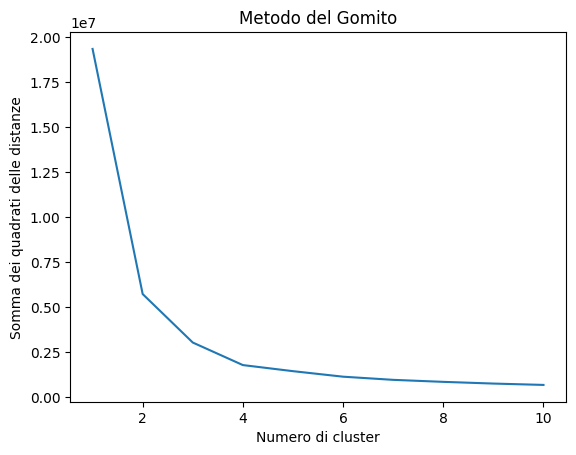

In [19]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(data)
    wcss.append(kmeans.inertia_)

# Plot del metodo del gomito
plt.plot(range(1, 11), wcss)
plt.title('Metodo del Gomito')
plt.xlabel('Numero di cluster')
plt.ylabel('Somma dei quadrati delle distanze')
plt.show()

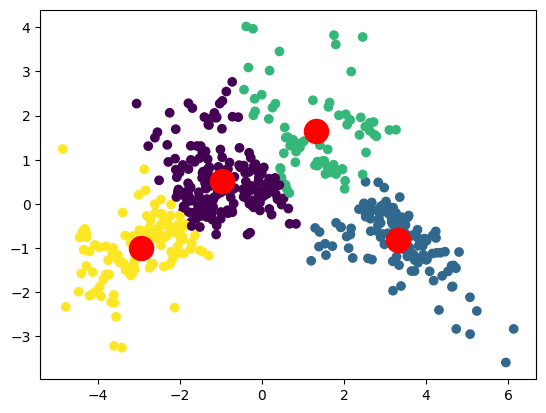

Silhouette Score: 0.20834690883389834


In [20]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(data)  # X è il tuo dataset con 14 attributi

# Applicazione di PCA per riduzione della dimensionalità
pca = PCA(n_components=2)  # Riduzione a 2 componenti principali per esempio
X_pca = pca.fit_transform(X_scaled) 

# Applicazione di K-Means con il numero ottimale di cluster trovato (8 nel tuo caso)
kmeans = KMeans(n_clusters=4, init='k-means++', max_iter=300, n_init=10, random_state=42)
pred_y = kmeans.fit_predict(X_pca)

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=pred_y, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red')
plt.show()

silhouette_avg = silhouette_score(data, kmeans.labels_)
print("Silhouette Score:", silhouette_avg)

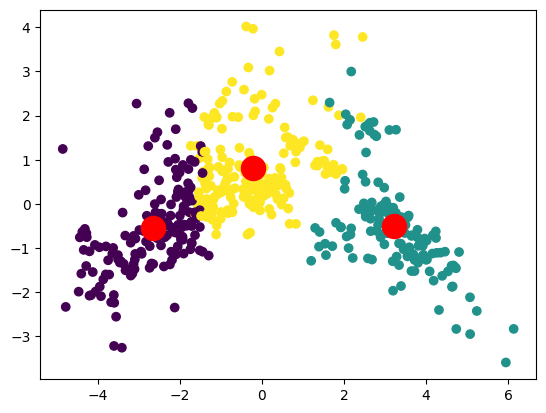

Silhouette Score: 0.24479556397637808


In [21]:
# Applicazione di PCA per riduzione della dimensionalità
pca = PCA(n_components=3)  # Riduzione a 2 componenti principali per esempio
X_pca = pca.fit_transform(X_scaled) 

# Applicazione di K-Means con il numero ottimale di cluster trovato (8 nel tuo caso)
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10, random_state=42)
pred_y = kmeans.fit_predict(X_pca)

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=pred_y, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red')
plt.show()

silhouette_avg = silhouette_score(data, kmeans.labels_)
print("Silhouette Score:", silhouette_avg)

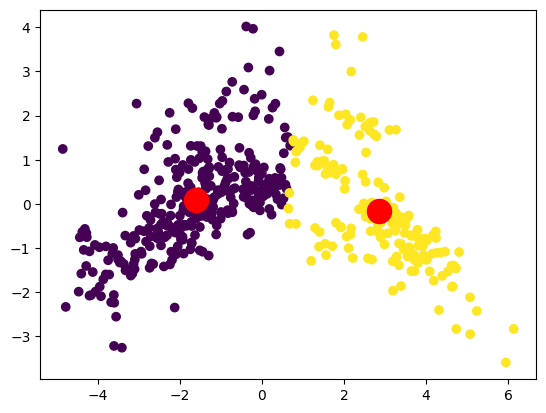

Silhouette Score: 0.5706935979398778


In [22]:
# Applicazione di PCA per riduzione della dimensionalità
pca = PCA(n_components=2)  # Riduzione a 2 componenti principali per esempio
X_pca = pca.fit_transform(X_scaled) 

# Applicazione di K-Means con il numero ottimale di cluster trovato (8 nel tuo caso)
kmeans = KMeans(n_clusters=2, init='k-means++', max_iter=300, n_init=10, random_state=42)
pred_y = kmeans.fit_predict(X_pca)

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=pred_y, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red')
plt.show()

silhouette_avg = silhouette_score(data, kmeans.labels_)
print("Silhouette Score:", silhouette_avg)

In [23]:
num_components_range = range(2, 13)  

best_num_components = None
best_silhouette_score = -1  

# Itera su diversi numeri di componenti principali
for n_components in num_components_range:
    
    pca = PCA(n_components=n_components)
    X_pca = pca.fit_transform(data)
    
    # Applica K-Means per il clustering
    kmeans = KMeans(n_clusters=2, random_state=42)
    pred_y = kmeans.fit_predict(X_pca)
    
    # Calcola l'indice di Silhouette
    silhouette_avg = silhouette_score(data, pred_y)
    print(f"Numero di componenti principali: {n_components}, Silhouette Score: {silhouette_avg}")
    
    # Aggiorna il miglior score e il miglior numero di componenti
    if silhouette_avg > best_silhouette_score:
        best_silhouette_score = silhouette_avg
        best_num_components = n_components

print(f"Miglior numero di componenti principali: {best_num_components}, Miglior Silhouette Score: {best_silhouette_score}")

Numero di componenti principali: 2, Silhouette Score: 0.6914046106237721
Numero di componenti principali: 3, Silhouette Score: 0.6914046106237721
Numero di componenti principali: 4, Silhouette Score: 0.6914046106237721
Numero di componenti principali: 5, Silhouette Score: 0.6914046106237721
Numero di componenti principali: 6, Silhouette Score: 0.6914046106237721
Numero di componenti principali: 7, Silhouette Score: 0.6914046106237721
Numero di componenti principali: 8, Silhouette Score: 0.6914046106237721
Numero di componenti principali: 9, Silhouette Score: 0.6914046106237721
Numero di componenti principali: 10, Silhouette Score: 0.6914046106237721
Numero di componenti principali: 11, Silhouette Score: 0.6914046106237721
Numero di componenti principali: 12, Silhouette Score: 0.6914046106237721
Miglior numero di componenti principali: 2, Miglior Silhouette Score: 0.6914046106237721
